<a href="https://colab.research.google.com/github/harenderk62/Delhi_House_Price_ML/blob/main/Delhi_HouseRent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting House rent prediction**

Importing Packages

In [ ]:
import pandas as pd
import numpy as np
      
      # Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
     
      # Text customiztion
from termcolor import colored as cl
      
      # Data split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
      
      # Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

     
      # Evaluation Metric
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20,10) # plot size

Importing Data

In [ ]:
df = pd.read_csv('DelhiRentPrice.csv')

df.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
df.dropna(inplace=True)

print(cl(df.isnull().sum(), attrs = ['bold']))

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
print(df.dtypes)

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object


EDA ( Exploratory Data Analysis)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['price'] = df['price'].astype('int64')

print(df.dtypes)

squareMeters         int64
numberOfRooms        int64
hasYard              int64
hasPool              int64
floors               int64
cityCode             int64
cityPartRange        int64
numPrevOwners        int64
made                 int64
isNewBuilt           int64
hasStormProtector    int64
basement             int64
attic                int64
garage               int64
hasStorageRoom       int64
hasGuestRoom         int64
price                int64
dtype: object


**Data Visualization**

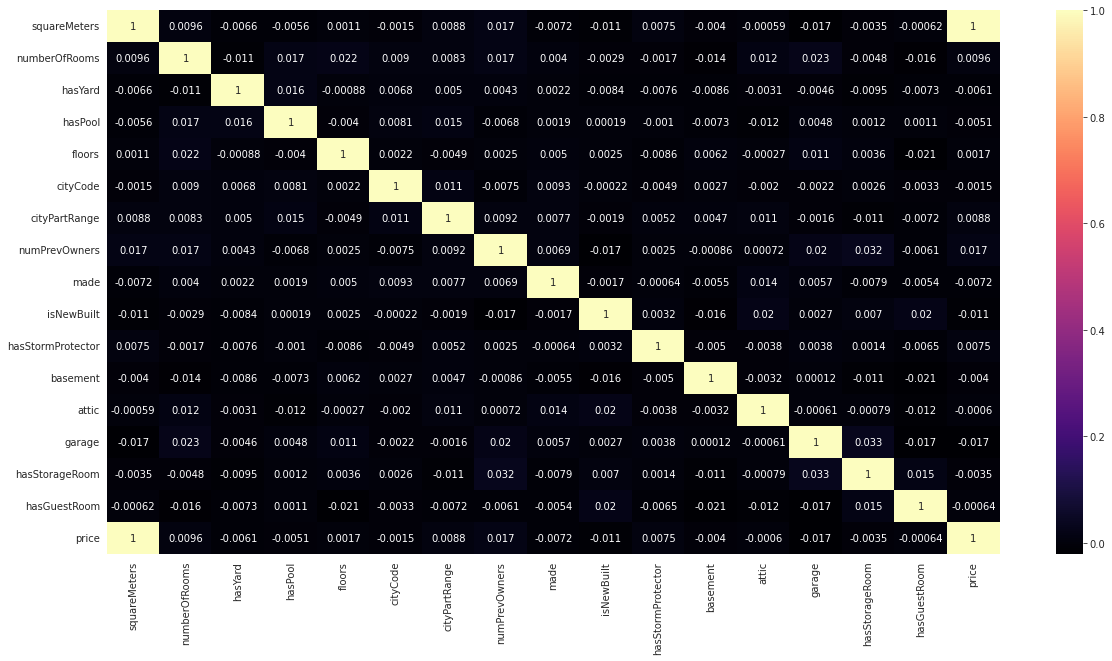

In [ ]:
# HeatMap

sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


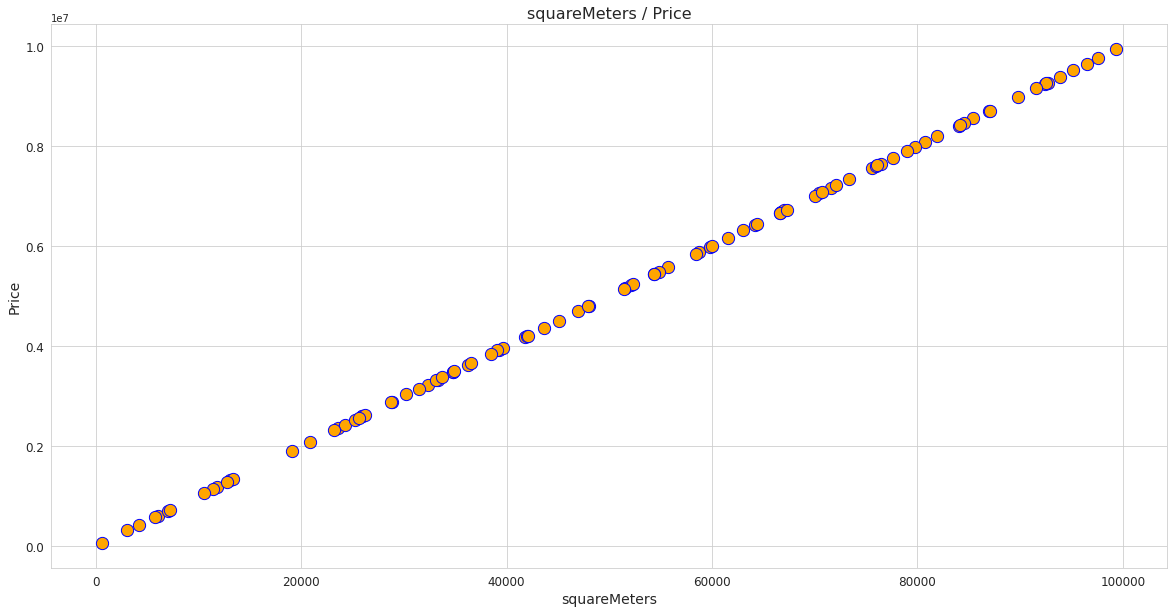

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


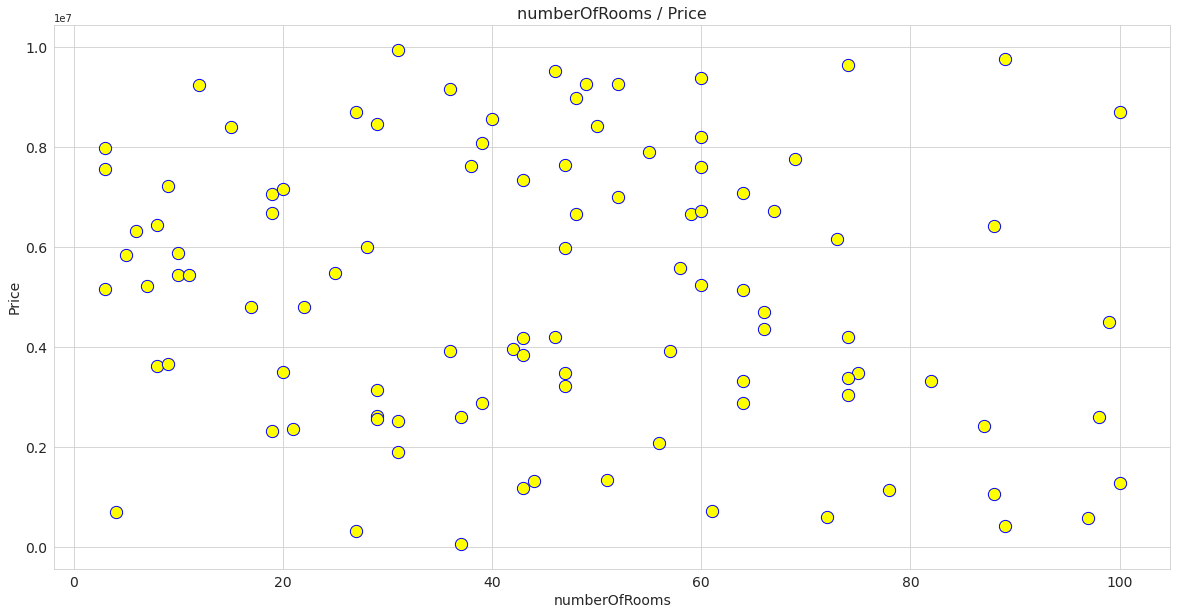

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


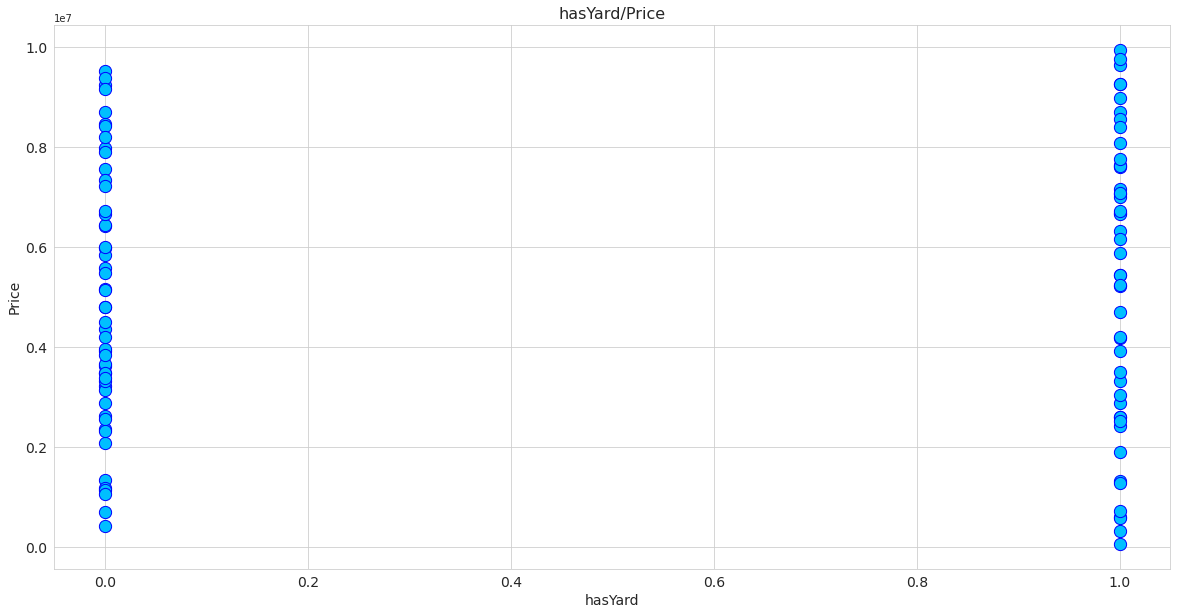

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


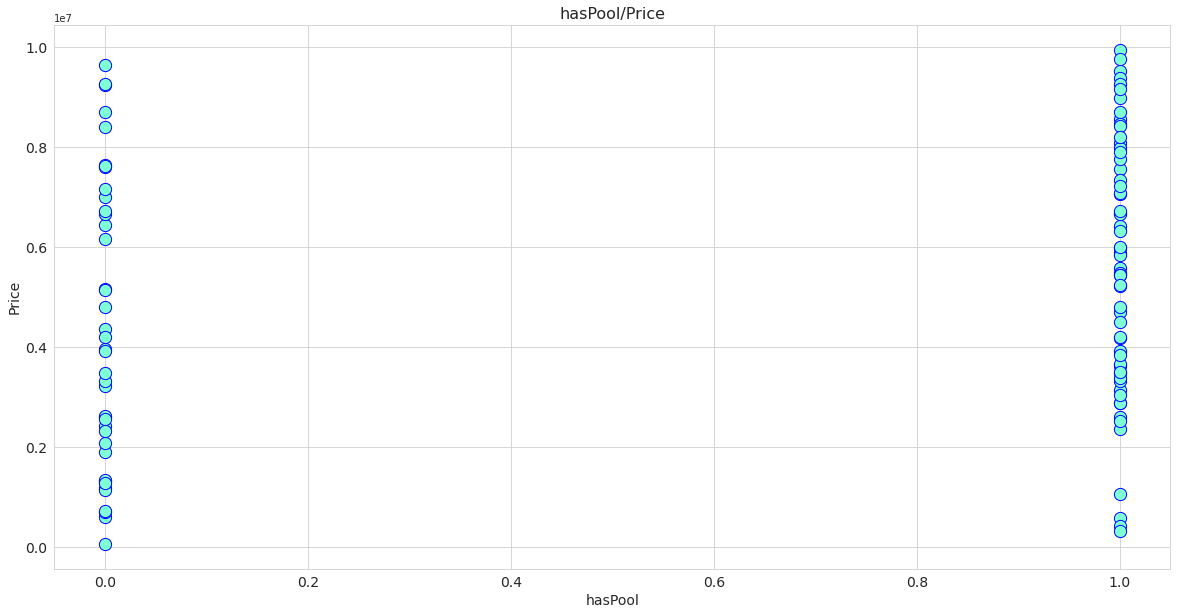

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


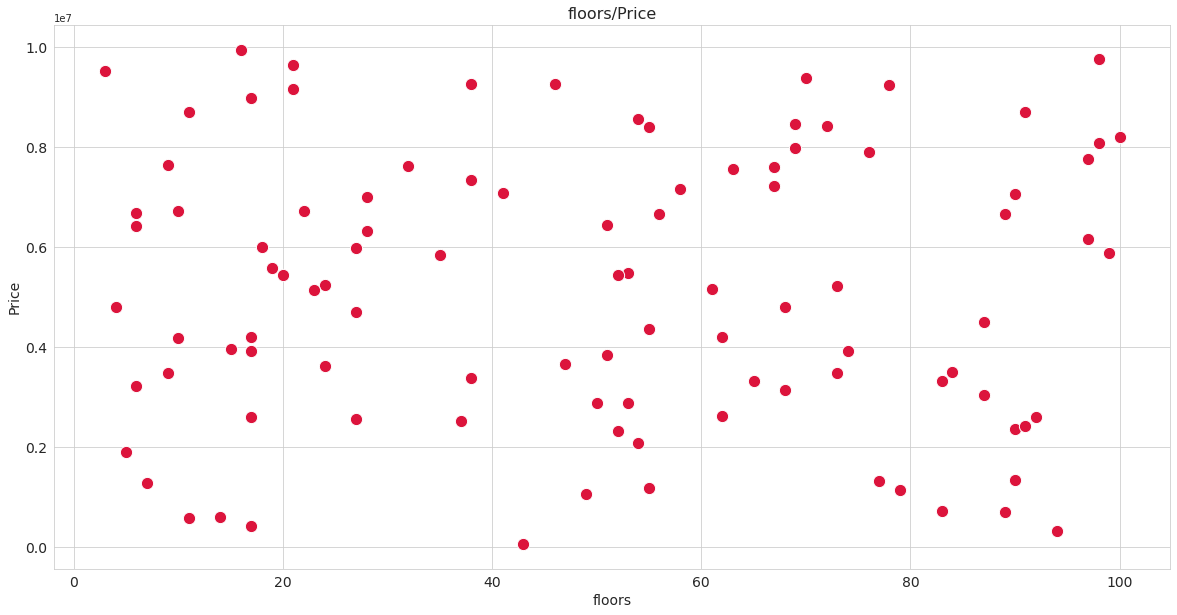

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


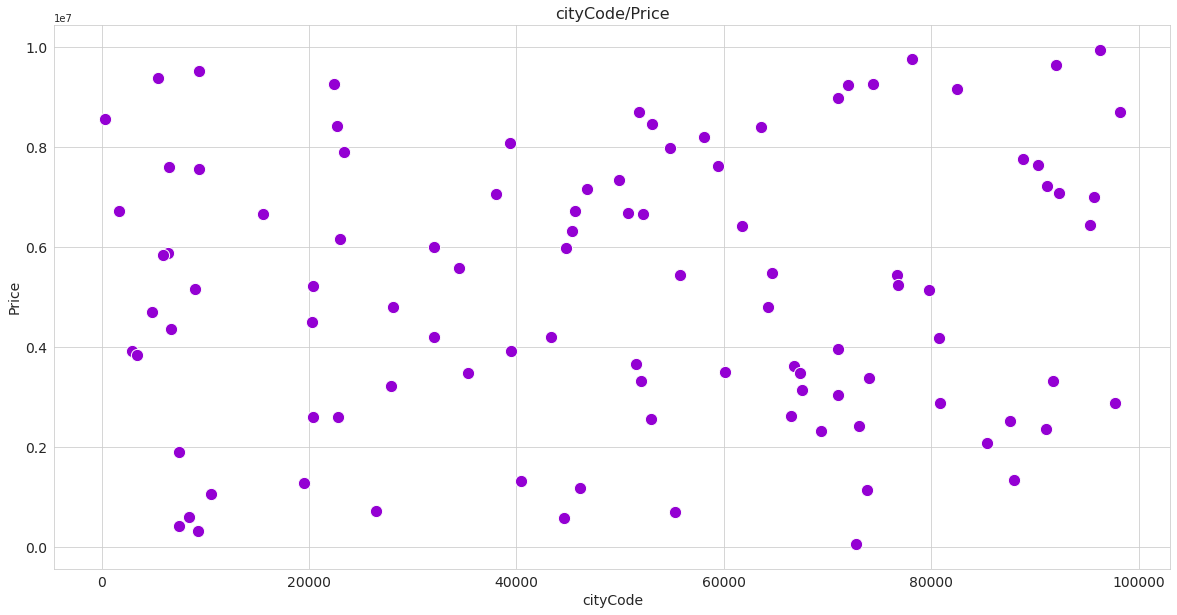

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


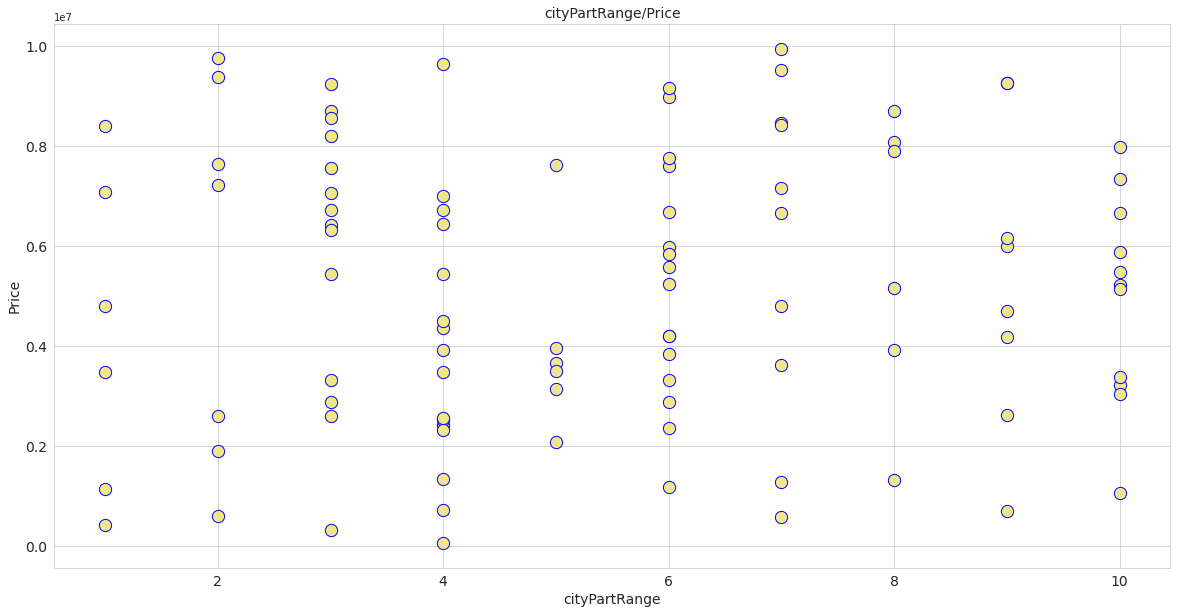

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


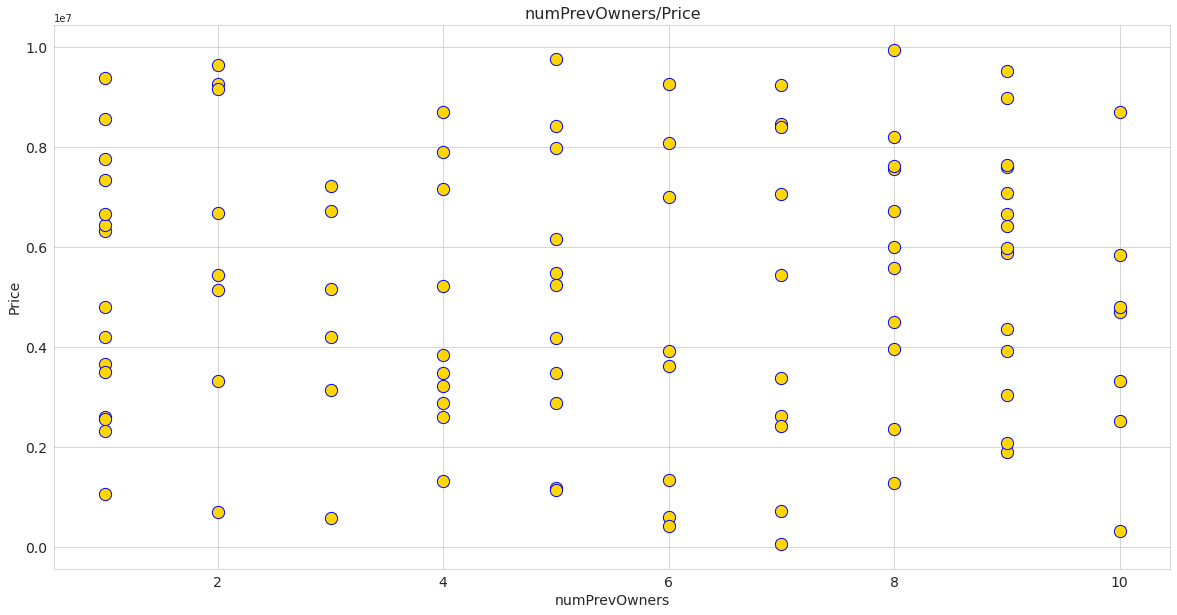

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


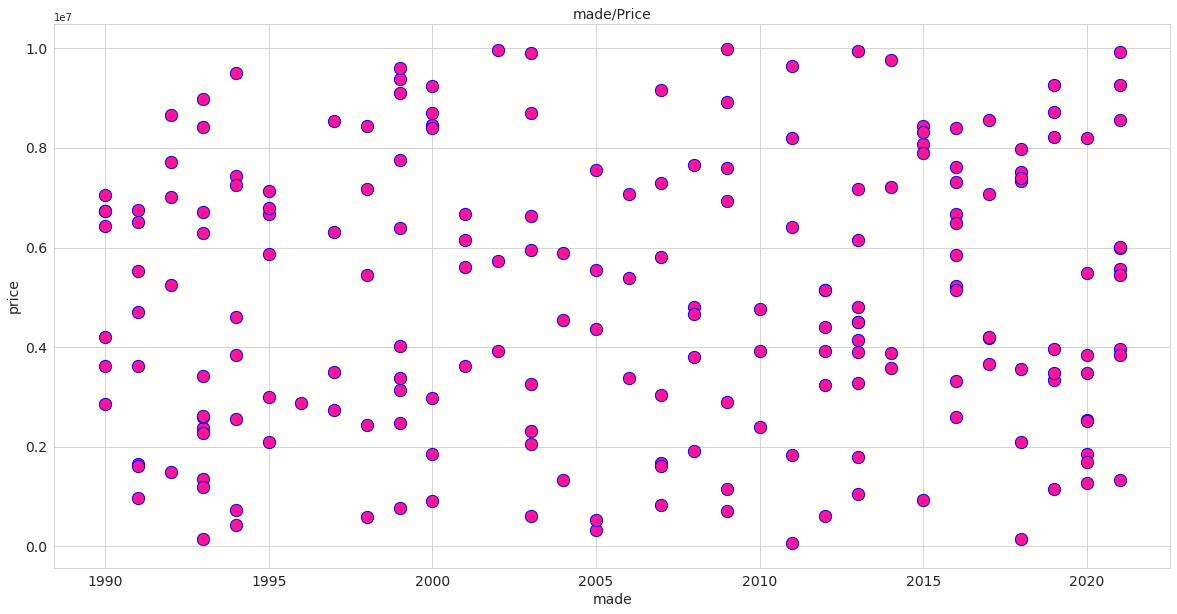

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


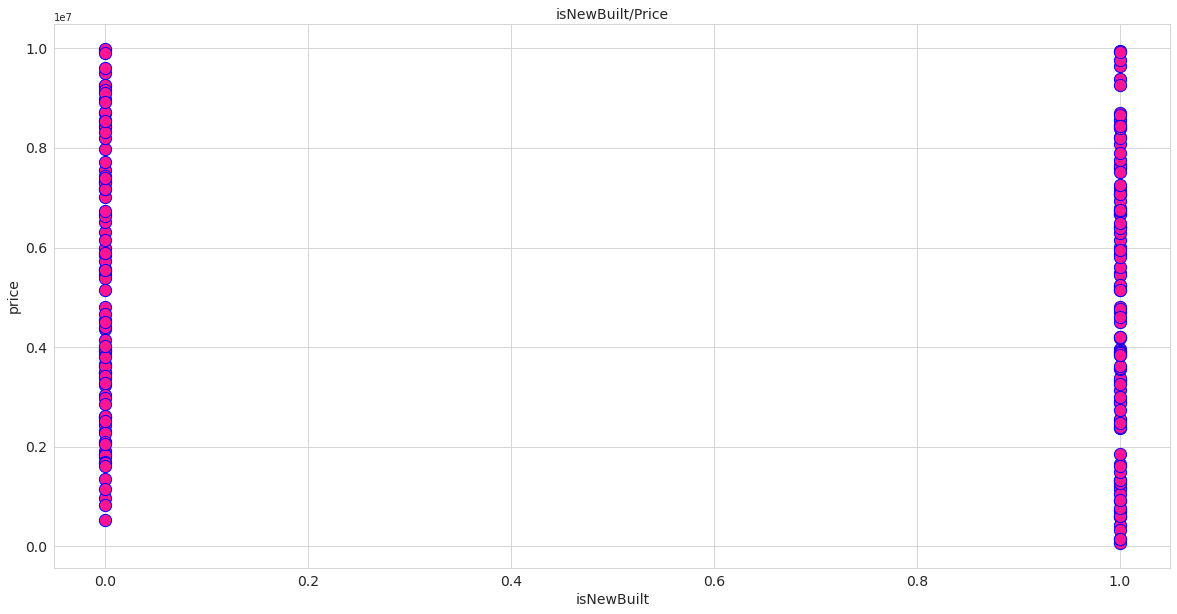

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


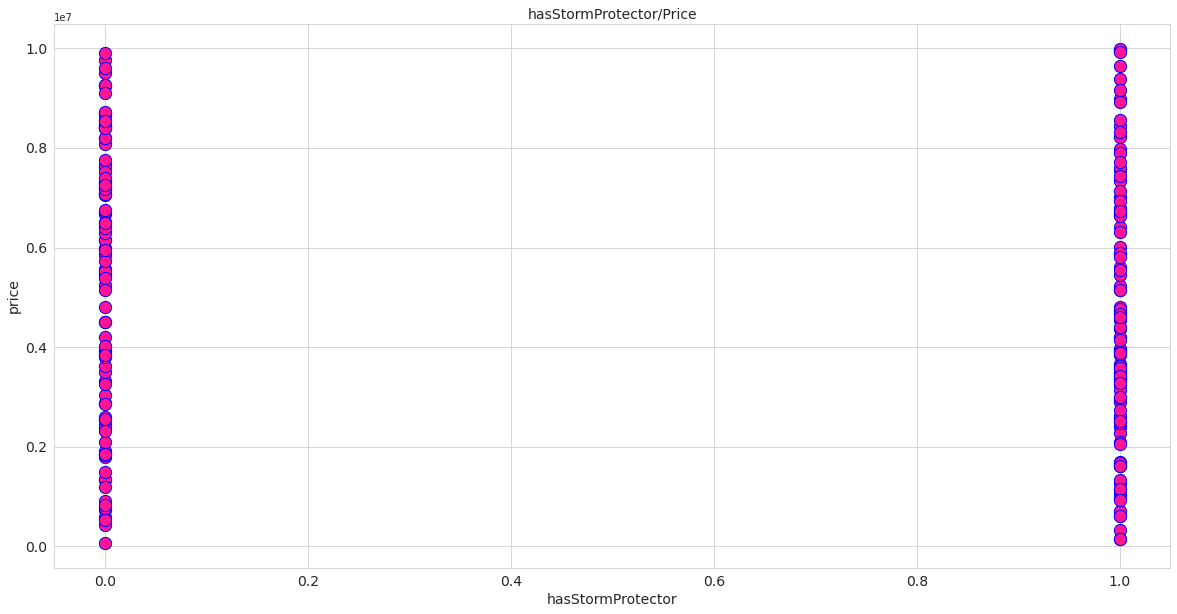

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


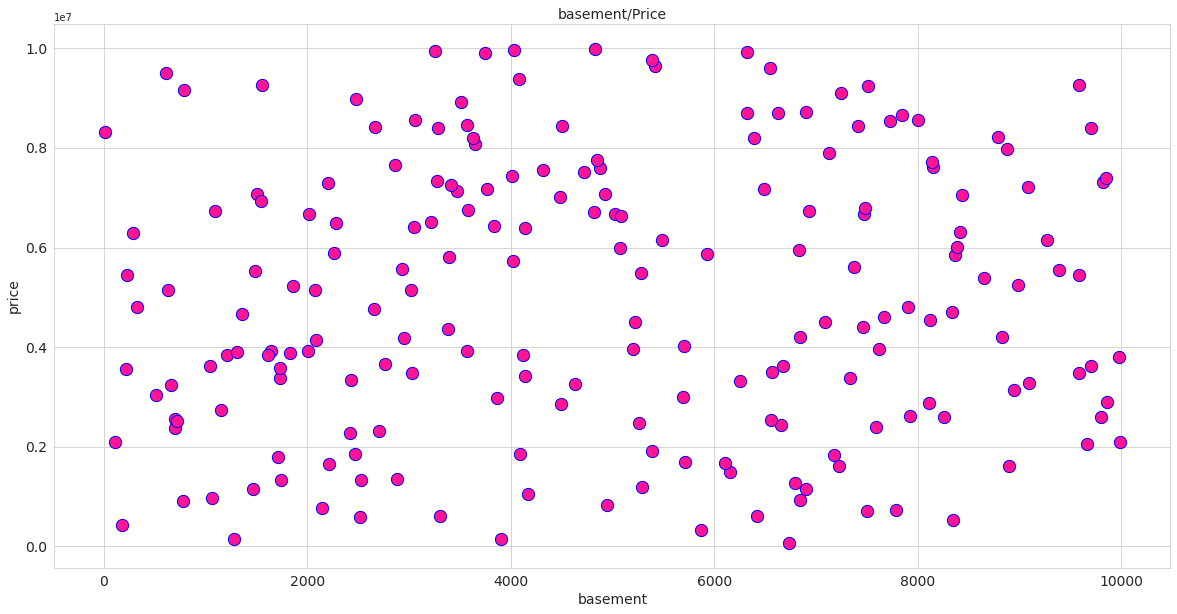

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


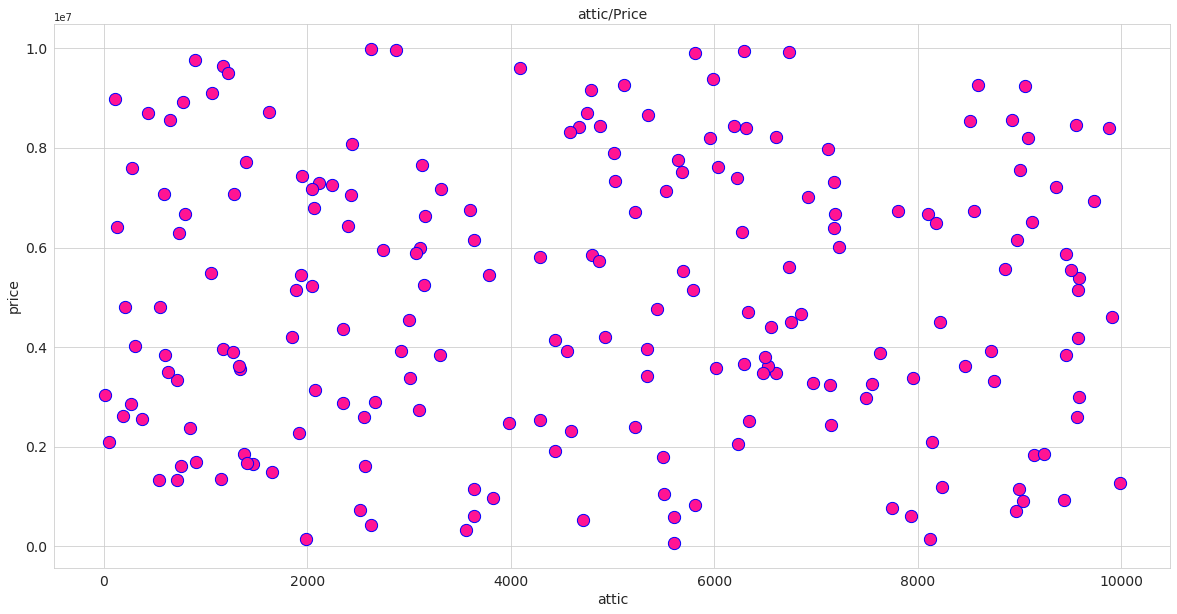

In [ ]:
# Scatter plot

def Scatter_df(y_var):
  Scatter_df = df.drop(y_var, axis =1)
  i = df.columns

  plot1 = sb.scatterplot(i[0], y_var, data = df.head(100), color = 'orange', edgecolor = 'b', s=150)
  plt.title('{} / Price'.format(i[0]), fontsize = 16)
  plt.xlabel('{}'.format(i[0]), fontsize =14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.show()

  plot2 = sb.scatterplot(i[1], y_var, data = df.head(100), color = 'yellow', edgecolor = 'b', s =150)
  plt.title('{} / Price'.format(i[1]), fontsize = 16)
  plt.xlabel('{}'.format(i[1]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

  plot3 = sb.scatterplot(i[2], y_var, data =df.head(100), color = 'deepskyblue', edgecolor = 'b', s=150)
  plt.title('{}/Price'.format(i[2]), fontsize = 16)
  plt.xlabel('{}'.format(i[2]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

  plot4 = sb.scatterplot(i[3], y_var, data = df.head(100), color = 'aquamarine', edgecolor = 'b', s=150)
  plt.title('{}/Price'.format(i[3]), fontsize = 16)
  plt.xlabel('{}'.format(i[3]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

  plot5 = sb.scatterplot(i[4], y_var, data = df.head(100), color = 'crimson', edgecolor = 'white', s =150)
  plt.title('{}/Price'.format(i[4]), fontsize = 16)
  plt.xlabel('{}'.format(i[4]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

  plot6 = sb.scatterplot(i[5], y_var, data = df.head(100), color = 'darkviolet', edgecolor = 'white', s=150)
  plt.title('{}/Price'.format(i[5]), fontsize = 16)
  plt.xlabel('{}'.format(i[5]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks(fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()

  plot7 = sb.scatterplot(i[6], y_var, data = df.head(100), color = 'Khaki', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[6]), fontsize = 14)
  plt.xlabel('{}'.format(i[6]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot8 = sb.scatterplot(i[7], y_var, data = df.head(100), color = 'gold', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[7]), fontsize = 16)
  plt.xlabel('{}'.format(i[7]), fontsize = 14)
  plt.ylabel('Price', fontsize = 14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot9 = sb.scatterplot(i[8], y_var, data = df.head(200), color = 'deeppink', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[8]), fontsize = 14)
  plt.xlabel('{}'.format(i[8]), fontsize = 14)
  plt.ylabel('price', fontsize  =14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot10 = sb.scatterplot(i[9], y_var, data = df.head(200), color = 'deeppink', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[9]), fontsize = 14)
  plt.xlabel('{}'.format(i[9]), fontsize = 14)
  plt.ylabel('price', fontsize  =14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot11 = sb.scatterplot(i[10], y_var, data = df.head(200), color = 'deeppink', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[10]), fontsize = 14)
  plt.xlabel('{}'.format(i[10]), fontsize = 14)
  plt.ylabel('price', fontsize  =14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot12 = sb.scatterplot(i[11], y_var, data = df.head(200), color = 'deeppink', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[11]), fontsize = 14)
  plt.xlabel('{}'.format(i[11]), fontsize = 14)
  plt.ylabel('price', fontsize  =14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

  plot13 = sb.scatterplot(i[12], y_var, data = df.head(200), color = 'deeppink', edgecolor = 'b', s =150)
  plt.title('{}/Price'.format(i[12]), fontsize = 14)
  plt.xlabel('{}'.format(i[12]), fontsize = 14)
  plt.ylabel('price', fontsize  =14)
  plt.xticks( fontsize = 14)
  plt.yticks( fontsize = 14)
  plt.show()

Scatter_df('price')

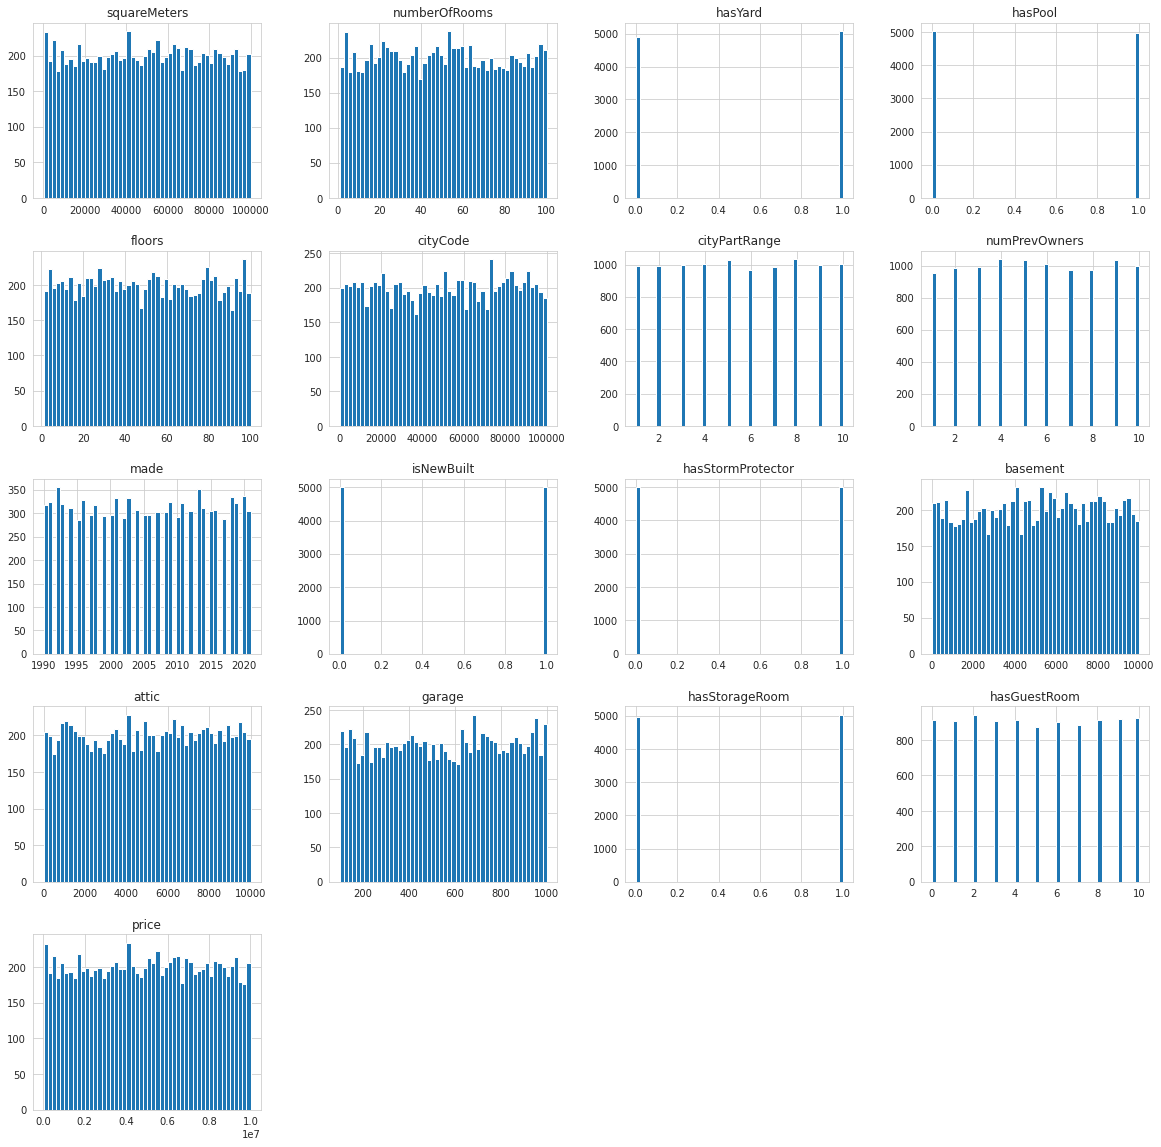

In [ ]:
# Histogram plot

df.hist(bins = 50, figsize= (20,20))
plt.show()

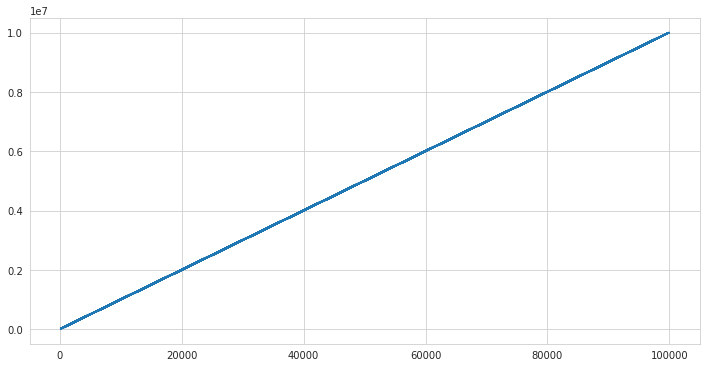

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['squareMeters'], df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


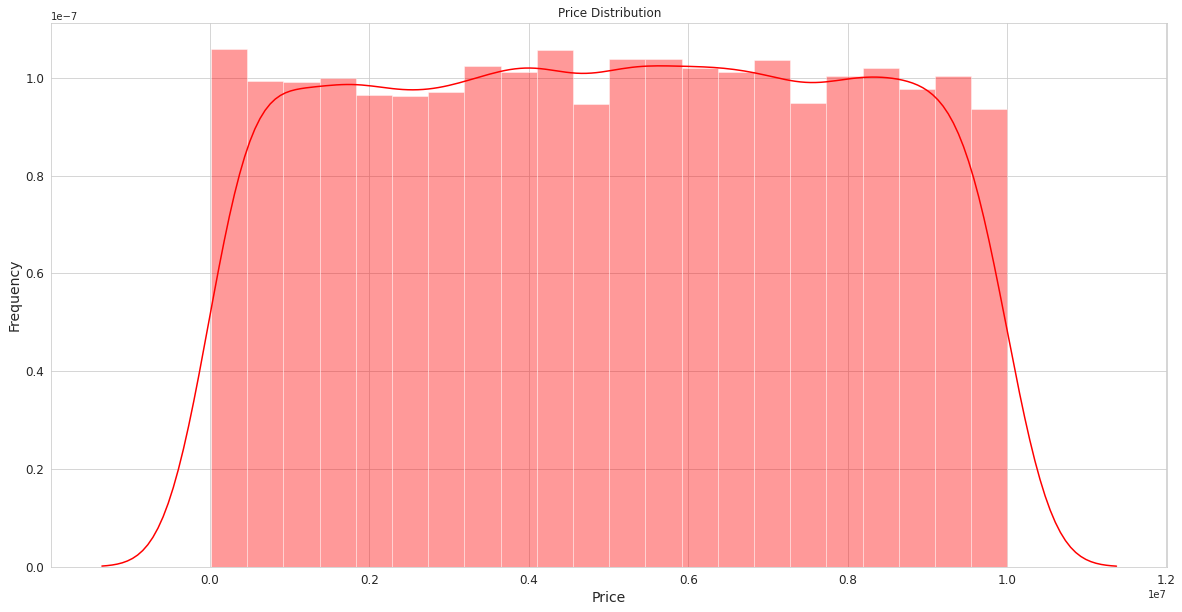

In [ ]:
# Distribution plot

sb.distplot(df['price'], color = 'r')
plt.title('Price Distribution')
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)

plt.show()

In [ ]:
#feature selection and Data Split

df.drop('cityCode', axis =1)
X_var = df[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom']].values
y_var = df['price'].values

X_train,X_test,y_train,y_test = train_test_split(X_var,y_var, test_size = 0.2, random_state = 12)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

8000 2000
8000 8000
2000 2000


In [ ]:
#MODELING Hard Code

# OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

#Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train,y_train)
ridge_yhat = ridge.predict(X_test)

#lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
lasso_yhat = lasso.predict(X_test)

#Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train,y_train)
bayesian_yhat = bayesian.predict(X_test)

# ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [ ]:
#feature selection and Data Split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set), len(test_set))

8000 2000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
pipeline = ColumnTransformer([('encoder', OneHotEncoder(), ['made']), ('scaler', StandardScaler(), ['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange',
                                                            'numPrevOwners','basement','attic', 'garage', 'hasGuestRoom'])])

In [ ]:
# preparing Data
train_set_predictors = train_set.drop('price', axis =1)
train_prepared = pipeline.fit_transform(train_set_predictors)

train_labels = train_set['price'].copy()
train_prepared.toarray()

array([[ 1.        ,  0.        ,  0.        , ...,  1.70579207,
         0.70692003, -0.93962897],
       [ 0.        ,  1.        ,  0.        , ...,  0.35353226,
         0.72979271, -0.62348178],
       [ 1.        ,  0.        ,  0.        , ..., -0.9949339 ,
        -0.84460972,  0.32495979],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.81842546,
        -1.10764548, -0.30733459],
       [ 0.        ,  0.        ,  0.        , ...,  0.69185587,
        -0.77980381, -0.93962897],
       [ 0.        ,  0.        ,  0.        , ...,  0.72289473,
         1.0042648 ,  1.58954856]])

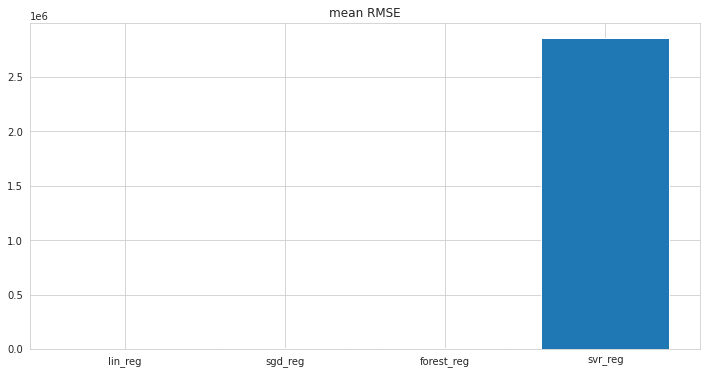

{'forest_reg': array([-16773191.08311258, -16462486.66929208, -17994525.16401928]),
 'forest_reg_mean': 4131.634357692504,
 'lin_reg': array([-8048141.48937978, -8388263.31647721, -8179783.49332673]),
 'lin_reg_mean': 2864.4022012455607,
 'sgd_reg': array([-93373288.2877441 , -89022934.45153274, -91070318.87228495]),
 'sgd_reg_mean': 9547.08635498086,
 'svr_reg': array([-8.16811387e+12, -8.02919407e+12, -8.26519231e+12]),
 'svr_reg_mean': 2855499.7446610467}

In [ ]:
lin_reg = LinearRegression()
sgd_reg = SGDRegressor()
forest_reg = RandomForestRegressor()
svr_reg = SVR()

models = ['lin_reg','sgd_reg', 'forest_reg', 'svr_reg']
dic_models = {}
means =[]

plt.figure(figsize = (12,6))

for model in models:
  scores = cross_val_score(eval(model), train_prepared, train_labels, cv = 3, scoring = 'neg_mean_squared_error')
  scores_ = np.sqrt(-scores)
  dic_models[model] = scores
  dic_models[f'{model}_mean'] = scores_.mean()
  means.append(scores_.mean())

plt.bar(models,means)
plt.title('mean RMSE')
plt.show()

dic_models

**Model Evaluation**

In [ ]:
# Explained Variance Score (EVS)

print(cl('Explained Variance Score: ', attrs = ['bold']))
print('\n')
print('EVS of OLS model is {}'.format(evs(y_test,ols_yhat)))
print('\n')
print('EVS of Ridge mode is {}'.format(evs(y_test,ridge_yhat)))
print('\n')
print('EVS of Lasso model is {}'.format(evs(y_test,lasso_yhat)))
print('\n')
print('EVS of Bayesian model is {}'.format(evs(y_test,bayesian_yhat)))
print('\n')
print('EVS of ElasticNet is {}'.format(evs(y_test,en_yhat)))

Explained Variance Score: 


EVS of OLS model is 0.9999995956956378


EVS of Ridge mode is 0.9999995956974654


EVS of Lasso model is 0.9999995956957067


EVS of Bayesian model is 0.9999995957056949


EVS of ElasticNet is 0.9999995956347658


In [ ]:
# R-squared

print(cl('R-Squared: ', attrs = ['bold']))
print('\n')
print('R-Squared of OLS model is {}'.format(r2(y_test,ols_yhat)))
print('\n')
print('R-Squared of Ridge mode is {}'.format(r2(y_test,ridge_yhat)))
print('\n')
print('R-Squared of Lasso model is {}'.format(r2(y_test,lasso_yhat)))
print('\n')
print('R-Squared of Bayesian model is {}'.format(r2(y_test,bayesian_yhat)))
print('\n')
print('R-Squared of ElasticNet is {}'.format(r2(y_test,en_yhat)))

R-Squared: 


R-Squared of OLS model is 0.999999595644583


R-Squared of Ridge mode is 0.9999995956464329


R-Squared of Lasso model is 0.9999995956446472


R-Squared of Bayesian model is 0.999999595654776


R-Squared of ElasticNet is 0.999999595585456


In [ ]:
# As we see before the correlation with the price is 1, so linear regression is just do perfect predictions,let's see

test_set_predictors = test_set.drop('price', axis =1)
test_set_prepared = pipeline.transform(test_set_predictors)
test_labels = test_set['price'].copy()
lin_reg.fit(train_prepared, train_labels)
pred = lin_reg.predict(test_set_prepared)
score = mean_squared_error(test_labels, pred)
score_ = np.sqrt(score)
score_

2885.238798122595

In [ ]:
r2(train_labels, test_labels)

1.0